<a href="https://colab.research.google.com/github/Nareshkumar30701/Optimization-Algorithms/blob/main/Optimization_Algorithms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
np.random.seed(42)
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

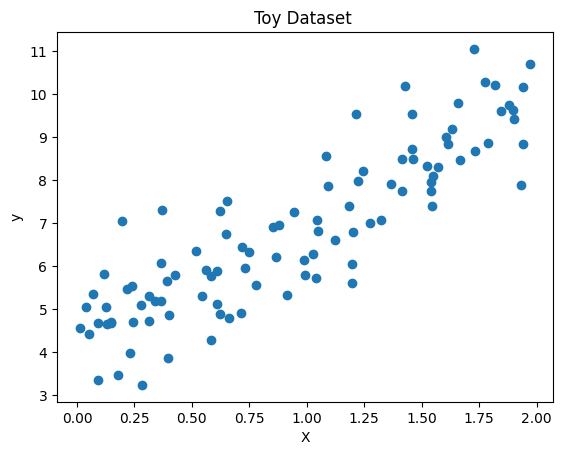

In [ ]:
# Visualize the dataset
plt . scatter (X , y )
plt . xlabel ("X")
plt . ylabel ("y")
plt . title ("Toy Dataset ")
plt . show ()

In [ ]:
X_b = np . c_ [ np . ones ((100 , 1) ) , X ] # add x0 = 1 to each instance
theta_best = np . linalg . inv ( X_b . T @ X_b ) @ X_b . T @ y

print ( f" Optimal parameters : { theta_best . ravel ()}")

 Optimal parameters : [5.56225906 1.44789846]


#After implementing OLS regression algorithm


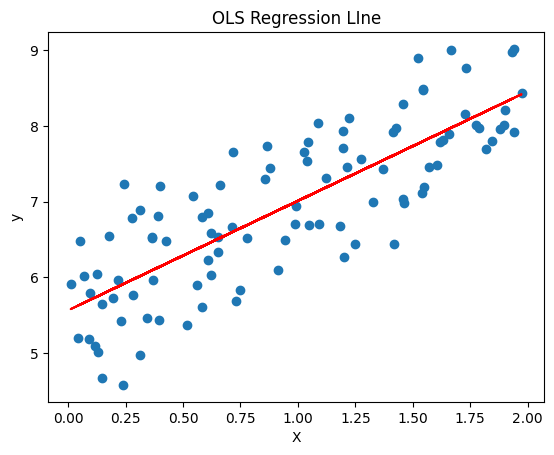

In [ ]:
plt.scatter(X, y)
plt.plot(X, X_b@theta_best, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('OLS Regression LIne')
plt.show()

##Visualize the Loss Function in 3D

In [ ]:

# Define the range for weights and biases
weight_range= np.linspace(0,6,100)
bias_range = np.linspace (-2,6,100)
weights,biases = np.meshgrid (weight_range,bias_range)

In [ ]:
# Initialize a matrix to hold the loss values
loss_values=np.zeros(weights.shape)

In [ ]:
# Compute the loss for each combination of weight and bias
for i in range(weights.shape[0]):
  for j in range(weights.shape[1]):
    y_pred=weights[i,j]*X+biases[i,j]
    loss_values [i,j] = np . mean (( y - y_pred ) **2)

#Plotting the loss function for respective weights and biases

In [ ]:
# Create an interactive 3D plot using plotly
fig = go . Figure ( data =[ go . Surface ( z = loss_values , x = weight_range , y = bias_range
) ])
fig . update_layout ( title ='Loss Surface for Single Neuron Model',
scene = dict ( xaxis_title ='Weight',
yaxis_title ='Bias',
zaxis_title ='Loss') )
fig . show ()

#Implementing Gradient Descent to minimize the loss function in ANN

In [ ]:
#initialize the parameters
m=0
c=-2
learning_rate=0.01
epochs=100

#Storing the values
m_values=[]
c_values=[]
loss_history=[]

#Gradient Descent
N=len(X)
for epoch in range(epochs):
  #computing the predictions for forward pass
  y_pred=m*X+c
  loss=np.mean((y-y_pred)**2)

  #storing the computed values
  m_values.append(m)
  c_values.append(c)
  loss_history.append(loss)

  #computing the gradients
  m_gradient = -2 * np . mean ( X * ( y - y_pred ) )
  c_gradient = -2 * np . mean ( y - y_pred )

  # Update parameters
  m -= learning_rate * m_gradient
  c -= learning_rate * c_gradient


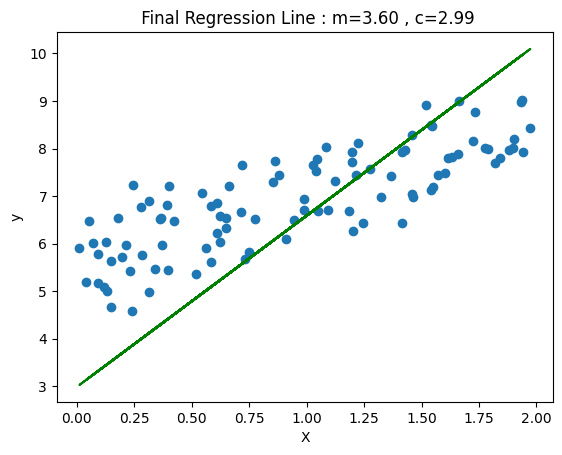

In [ ]:
# Plot the parameters on the 3D loss surface
scatter = go . Scatter3d ( x = m_values , y = c_values , z = loss_history , mode ='lines + markers',marker = dict ( size =5 , color ='red') , name = 'OptimizationPath')
fig . add_trace ( scatter )
fig . show ()

# Plot the final regression line
plt . scatter (X , y )
plt . plot (X , m * X + c , color ='green')
plt . xlabel ("X")
plt . ylabel ("y")
plt . title ( f" Final Regression Line : m={m:.2f} , c={c:.2f}")
plt . show ()
